<a href="https://colab.research.google.com/github/Ramyasri2407/port/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv("/content/emotion_dataset_raw.csv")
df.head()


,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


<Axes: xlabel='Emotion', ylabel='count'>

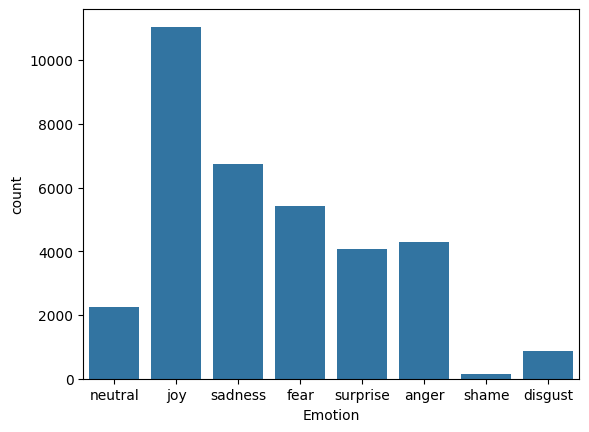

In [5]:
df['Emotion'].value_counts()

sns.countplot(x='Emotion',data=df)

In [6]:
!pip install neattext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 6.7 MB/s eta 0:00:00


In [8]:
import neattext.functions as nfx

# Remove the user handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [9]:
import neattext.functions as nfx

# Example usage:
sample = "@user123 I'm soooo happyyyy today!!! #blessed 😊"
cleaned = nfx.remove_userhandles(sample)
cleaned = nfx.remove_stopwords(cleaned)
print(cleaned)


I'm soooo happyyyy today!!! #blessed 😊


In [10]:
# Remove the stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [12]:
x = df['Clean_Text']
y = df['Emotion']

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [15]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6201379574631155

In [16]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc', SVC(kernel = 'rbf', C = 10))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

0.62195822954589

In [17]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.5608354090821996

In [18]:
pip install transformers datasets torch scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [19]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TextClassificationPipeline
from sklearn.metrics import accuracy_score, classification_report

# Load pretrained tokenizer and model
model_name = "j-hartmann/emotion-english-distilroberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a pipeline
bert_pipeline = TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=False)

# Predict on your test set
y_pred = [bert_pipeline(text)[0]['label'] for text in x_test]

# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

Device set to use cuda:0
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Accuracy: 0.431691894999042

Classification Report:
               precision    recall  f1-score   support

       anger       0.51      0.47      0.49      1283
     disgust       0.15      0.17      0.16       292
        fear       0.64      0.47      0.54      1645
         joy       0.64      0.41      0.50      3311
     neutral       0.18      0.66      0.29       675
     sadness       0.50      0.51      0.50      2015
       shame       0.00      0.00      0.00        36
    surprise       0.21      0.20      0.21      1181

    accuracy                           0.43     10438
   macro avg       0.36      0.36      0.34     10438
weighted avg       0.50      0.43      0.45     10438



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
# View a few sample predictions
for text, actual, pred in zip(x_test[:10], y_test[:10], y_pred[:10]):
    print(f"Text: {text}\nActual: {actual} | Predicted: {pred}\n")


Text: Cody coming NEAR live. all. );
Actual: sadness | Predicted: neutral

Text: Woah, annoyed much! #JustLikeBefore people change!
Actual: anger | Predicted: anger

Text: ` Forgive , Miss Kyte , " said lady softly , ` look downcast . "
Actual: sadness | Predicted: sadness

Text: Great, got biology ISA morning
Actual: joy | Predicted: joy

Text: People know blessed u you'ra medical student -.- .. goes smoothly
Actual: anger | Predicted: joy

Text: Classes. Orchestra. &amp; Meeting Work
Actual: joy | Predicted: neutral

Text: “ afraid tomorrow, seen yesterday love today #less” AMEN
Actual: fear | Predicted: fear

Text: .
Actual: neutral | Predicted: neutral

Text: Terrible .
Actual: neutral | Predicted: fear

Text: precal final 7 am....guess going pulling allnighter o_o
Actual: joy | Predicted: neutral



In [22]:
emotion_emoji_map = {
    "joy": "😄",
    "sadness": "😢",
    "anger": "😠",
    "fear": "😨",
    "surprise": "😲",
    "disgust": "🤢",
    "shame": "😳",
    "neutral": "😐"
}


In [23]:
# View sample predictions with emoji
for text, actual, pred in zip(x_test[:10], y_test[:10], y_pred[:10]):
    emoji = emotion_emoji_map.get(pred, "")
    print(f"Text: {text}\nActual: {actual} | Predicted: {pred} {emoji}\n")


Text: Cody coming NEAR live. all. );
Actual: sadness | Predicted: neutral 😐

Text: Woah, annoyed much! #JustLikeBefore people change!
Actual: anger | Predicted: anger 😠

Text: ` Forgive , Miss Kyte , " said lady softly , ` look downcast . "
Actual: sadness | Predicted: sadness 😢

Text: Great, got biology ISA morning
Actual: joy | Predicted: joy 😄

Text: People know blessed u you'ra medical student -.- .. goes smoothly
Actual: anger | Predicted: joy 😄

Text: Classes. Orchestra. &amp; Meeting Work
Actual: joy | Predicted: neutral 😐

Text: “ afraid tomorrow, seen yesterday love today #less” AMEN
Actual: fear | Predicted: fear 😨

Text: .
Actual: neutral | Predicted: neutral 😐

Text: Terrible .
Actual: neutral | Predicted: fear 😨

Text: precal final 7 am....guess going pulling allnighter o_o
Actual: joy | Predicted: neutral 😐

